# Assignment 3 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Personal Details:

In [31]:
# Details Student 1: Zohar Sabag

# Details Student 2:


## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [32]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [33]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [34]:
# word net installation:

# unmark if you want to use and need to install
# %pip install wn
# %python -m wn download omw-he:1.4

In [35]:
# word net import:

# unmark if you want to use:
import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [36]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
# %pip install hebrew_tokenizer

In [37]:
# Hebrew tokenizer import:

# unmark if you want to use:
import hebrew_tokenizer as ht

### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [38]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [39]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [40]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

### Starting with some EDA

In [41]:
# Checking if we have missing values
df_test.isnull().sum()
df_train.isnull().sum()

test_example_id    0
story              0
dtype: int64

story     0
gender    0
dtype: int64

In [42]:
# Checking whether the data is balanced

count_female = df_train[df_train['gender'] == 'f'].shape[0]
count_male = df_train[df_train['gender'] == 'm'].shape[0]
print("Number of females:", count_female)
print("Number of males:", count_male)

Number of females: 178
Number of males: 575


#### There are more stories written by males than females

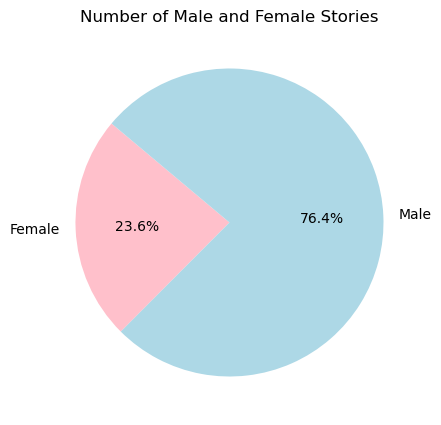

In [43]:
female_size = df_train[df_train.gender == 'f'].size
male_size = df_train[df_train.gender == 'm'].size
sizes = [female_size, male_size]
labels = ['Female', 'Male']
colors = ['pink', 'lightblue']

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Number of Male and Female Stories')
plt.show();

### I made a custom tokenizer function that used hebrew_tokenizer to filter punctuation and numbers

In [44]:
def custom_tokenizer(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r"'+", '', text) 
    tokens = ht.tokenize(text)
    hebrew_tokens = [token for grp, token, _, _ in tokens if grp == 'HEBREW']
    return hebrew_tokens

In [45]:
# Another function that counts the amount of words in the story, the function uses the custom tokenizer
def count_words(text):
    tokens = custom_tokenizer(text)
    return len(tokens)

### Amount of words in the stories according to gender

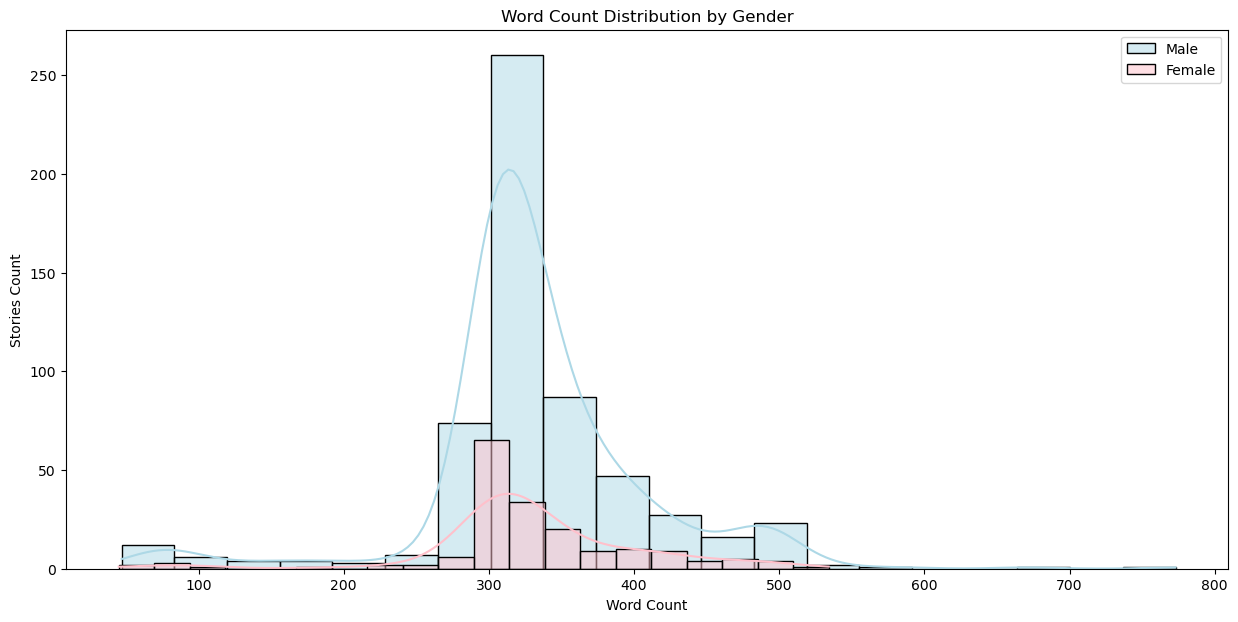

In [46]:
def plot_word_count_distribution(male_data, female_data):
    male_data['word_count'] = male_data['story'].apply(count_words)
    female_data['word_count'] = female_data['story'].apply(count_words)
    
    plt.figure(figsize=(15, 7))
    sns.histplot(data=male_data, x='word_count', bins=20, kde=True, label='Male', color='lightblue')
    sns.histplot(data=female_data, x='word_count', bins=20, kde=True, label='Female', color='pink')
    plt.title('Word Count Distribution by Gender')
    plt.xlabel('Word Count')
    plt.ylabel('Stories Count')
    plt.legend()
    plt.show()

# Filter the data for male and female authors
male_data = df_train.query("gender == 'm'")
female_data = df_train.query("gender == 'f'")

# Plot word count distributions
plot_word_count_distribution(male_data, female_data)

### Showing the common words in each gender

In [47]:
from collections import defaultdict

male_data['word_count'] = male_data['story'].apply(count_words)
male_data['tokens'] = male_data['story'].apply(custom_tokenizer)

female_data['word_count'] = female_data['story'].apply(count_words)
female_data['tokens'] = female_data['story'].apply(custom_tokenizer)

def most_common_words(words):
    word_counts = defaultdict(int)
    for word_list in words:
        for word in word_list:
            word_counts[word] += 1

    word_counts_dict = dict(word_counts)
    word_count_list = [(word, count) for word, count in word_counts_dict.items()]
    word_count_list_sorted = sorted(word_count_list, key=lambda x: x[1], reverse=True)
    return word_count_list_sorted[:50], word_count_list_sorted[:300], word_count_list_sorted

top50_female_most_common_words, top300_female_most_common_words, female_most_common_words= most_common_words(female_data['tokens'])
top50_male_most_common_words, top300_male_most_common_words, male_most_common_words= most_common_words(male_data['tokens'])

print("Amount of unique words in females stories",len(female_most_common_words))
print("Amount of unique words in males stories",len(male_most_common_words))

Amount of unique words in females stories 14021
Amount of unique words in males stories 30070


### Word Clouds

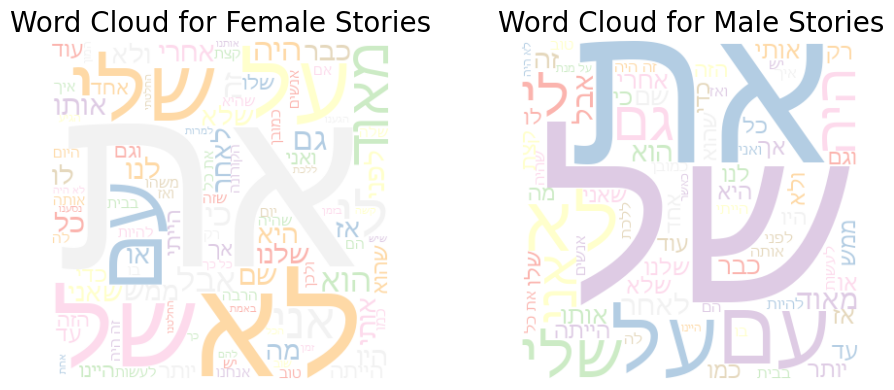

In [48]:
from wordcloud import WordCloud

female_stories = df_train[df_train['gender'] == 'f']['story'].values
male_stories = df_train[df_train['gender'] == 'm']['story'].values

def create_word_cloud(stories, title, position):
    text = ' '.join([story[::-1] for story in stories])
    wordcloud = WordCloud(font_path='/tahoma.ttf',
                          width=350, height=350,
                          background_color='white',
                          min_font_size=10,
                          colormap='Pastel1',
                          max_words=100).generate(text)
    
    plt.subplot(1, 2, position)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=20)

plt.figure(figsize=(10, 4), facecolor=None) 
create_word_cloud(female_stories, title="Word Cloud for Female Stories", position=1)
create_word_cloud(male_stories, title="Word Cloud for Male Stories", position=2)
plt.tight_layout()
plt.show();

In [49]:
def show_top_words(words, c):
    words_names = [word[0][::-1] for word in words]
    words_counts = [word[1] for word in words]

    plt.figure(figsize=(25, 15)) 
    plt.bar(words_names, words_counts, color=c)
    plt.xlabel('words', fontsize=20)
    plt.ylabel('Count', fontsize=20)
    plt.title('Top 50 words', fontsize=26)
    plt.xticks(rotation=45, fontsize=14)
    plt.tight_layout()
    plt.show();

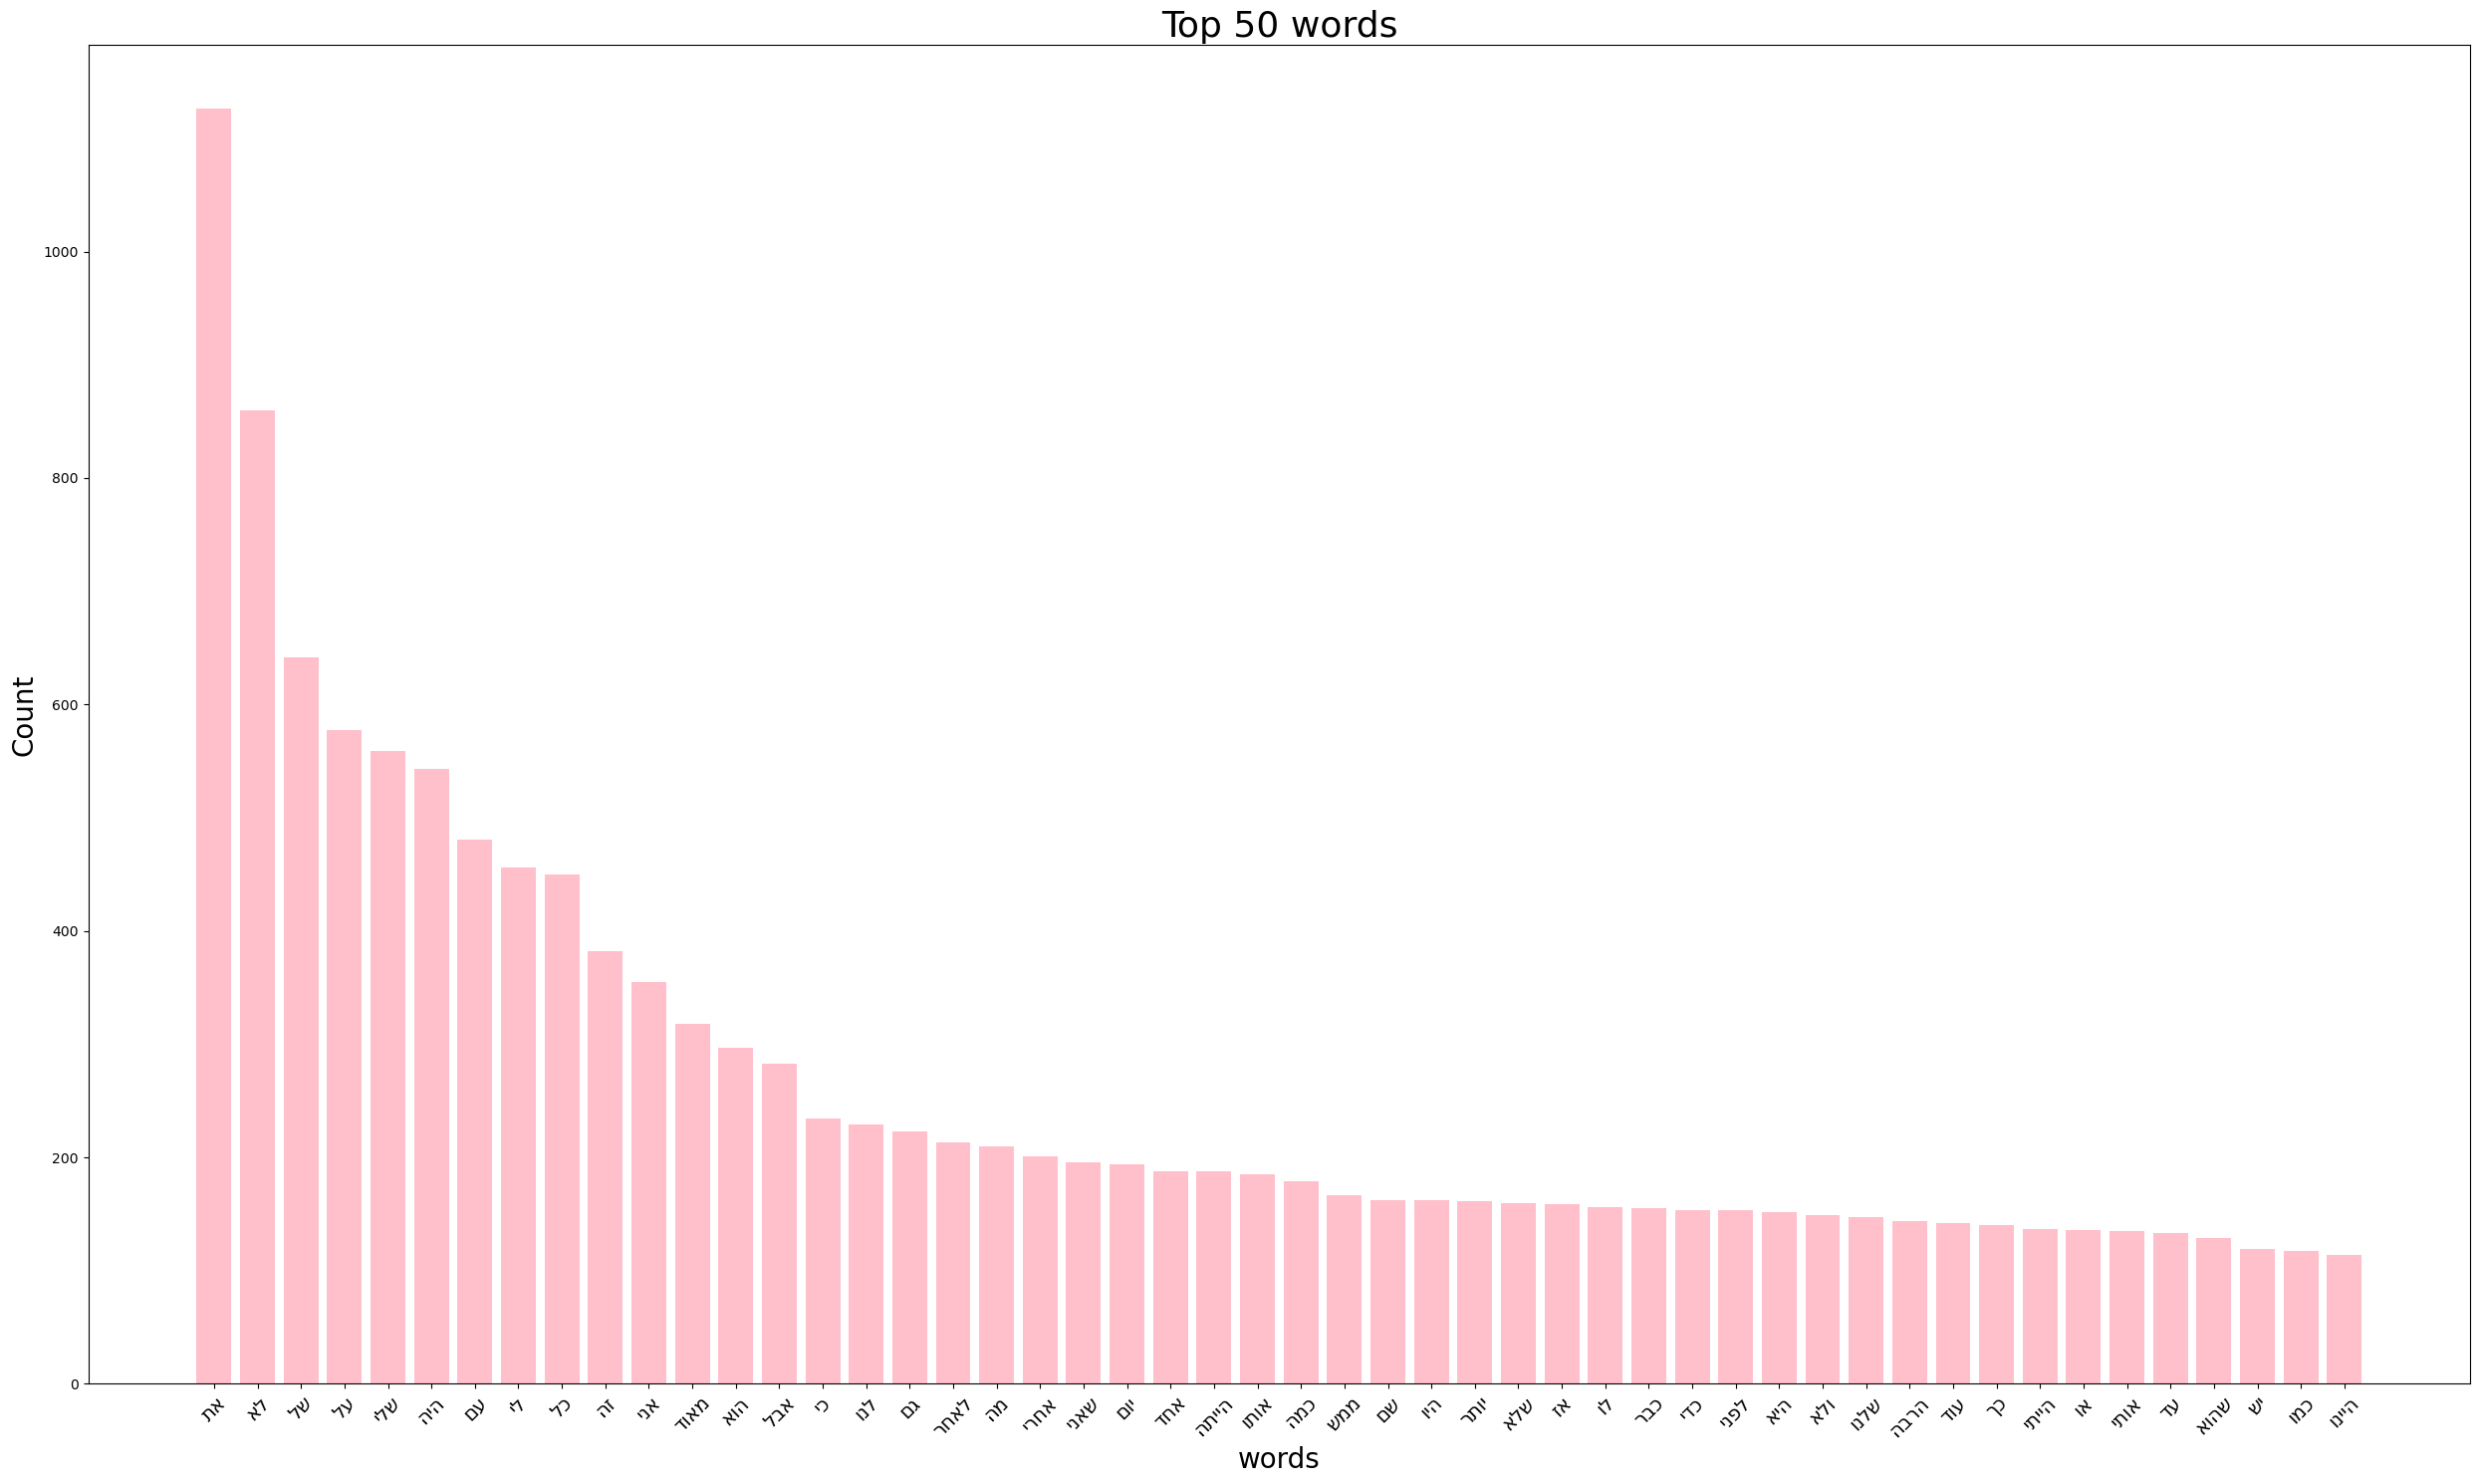

In [50]:
show_top_words(top50_female_most_common_words,'pink')

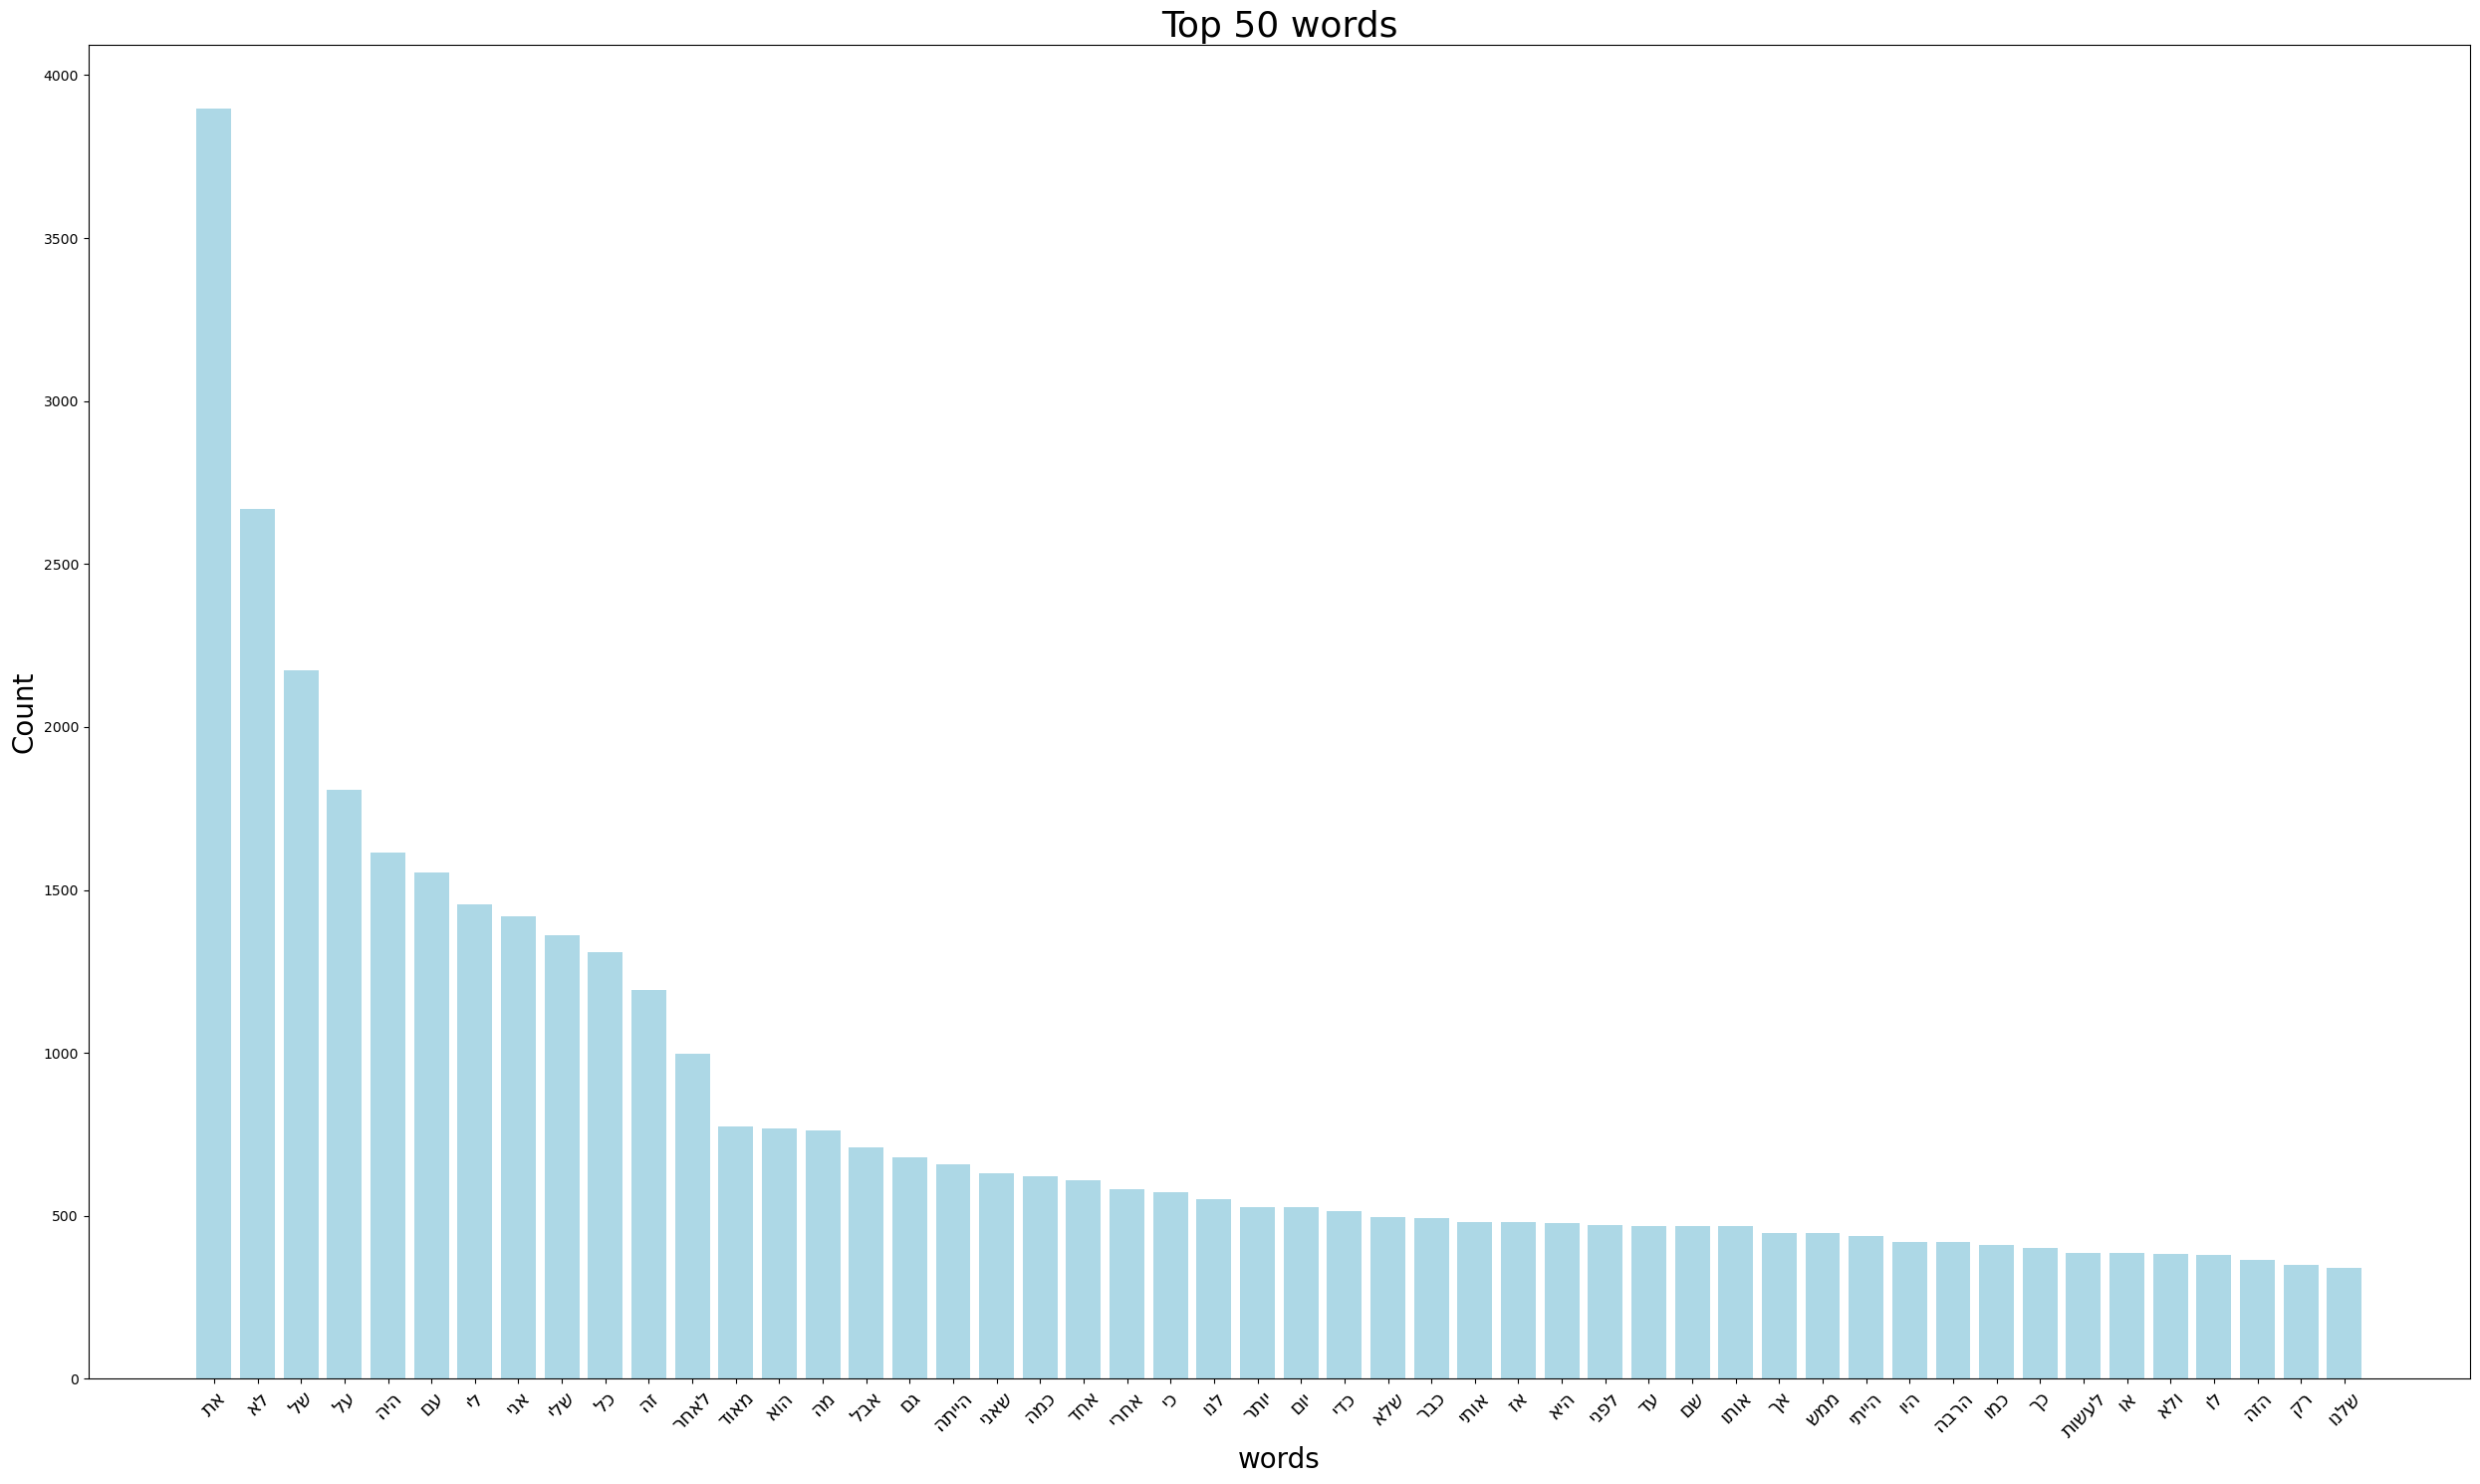

In [51]:
show_top_words(top50_male_most_common_words,'lightblue')

### According to the graphs, it can be seen that among the common words there are many words that are common to both genders.
### I decided to look at the list of the 300 most common words and remove the common ones between them.


In [52]:
female_common_words = set([word for word, _ in top300_female_most_common_words])
male_common_words = set([word for word, _ in top300_male_most_common_words])

# Finds the common words in both lists and combines them into one list
common_words = list(female_common_words.intersection(male_common_words))

print(len(common_words))

245


### It can be seen that out of the 300 most common words, 245 of them are common to both genders

In [54]:
# filter and save the tokens

def filter_words(tokens, common_words):
    return [token for token in tokens if token not in common_words]

df_train['tokens'] = df_train['story'].apply(custom_tokenizer)
df_train['filtered_tokens'] = df_train['tokens'].apply(lambda tokens: filter_words(tokens, common_words))

In [55]:
df_train

,story,gender,tokens,filtered_tokens
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m,"[כשחבר, הזמין, אותי, לחול, לא, באמת, חשבתי, שז...","[כשחבר, הזמין, לחול, יקרה, ותיארתי, לעצני, יתב..."
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m,"[לפני, שהתגייסתי, לצבא, עשיתי, כל, מני, מיונים...","[שהתגייסתי, לצבא, עשיתי, מני, מיונים, ליחידות,..."
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f,"[מאז, שהתחילו, הלימודים, חלומו, של, כל, סטודנט...","[מאז, שהתחילו, הלימודים, חלומו, סטודנט, הפנגוי..."
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m,"[כשהייתי, ילד, מטוסים, היה, הדבר, שהכי, ריתק, ...","[כשהייתי, ילד, מטוסים, הדבר, שהכי, ריתק, בתור,..."
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f,"[הייתי, מדריכה, בכפר, נוער, ומתאם, הכפר, היינו...","[מדריכה, בכפר, נוער, ומתאם, הכפר, לטוס, לטיול,..."
...,...,...,...,...
748,אז לפני שנה בדיוק טסתי לאמסטרדם עם שני חברים ט...,m,"[אז, לפני, שנה, בדיוק, טסתי, לאמסטרדם, עם, שני...","[טסתי, לאמסטרדם, שני, טובים, בזה, שהיינו, בבר,..."
749,שבוע שעבר העליתי באופן ספונטני רעיון לנסוע עם ...,m,"[שבוע, שעבר, העליתי, באופן, ספונטני, רעיון, לנ...","[שעבר, העליתי, באופן, ספונטני, רעיון, לנסוע, מ..."
750,לפני חודש עברנו לדירה בבית שמש בעקבות משפחתי ה...,m,"[לפני, חודש, עברנו, לדירה, בבית, שמש, בעקבות, ...","[עברנו, לדירה, שמש, בעקבות, משפחתי, המתגוררת, ..."
751,"החוויה אותה ארצה לשתף התרחשה לפני כמה חודשים, ...",f,"[החוויה, אותה, ארצה, לשתף, התרחשה, לפני, כמה, ...","[החוויה, ארצה, לשתף, התרחשה, קיצי, וחם, באמצע,..."


In [56]:
# Since the models do not know how to work with strigs we will convert the gender column to numbers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(df_train.gender)

X_train = df_train['filtered_tokens']

# Split the data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=42)


In [57]:
from sklearn.metrics import classification_report
models_best_estimator={}
models_best_results={}

## KNN

### CountVectorizer

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(preprocessor=<function <lambda> at 0x0000024BA7173CE0>,
                                                        tokenizer=<function <lambda> at 0x0000024BA776FA60>)),
                                       ('norm', Normalizer()),
                                       ('clf', KNeighborsClassifier())]),
             param_grid={'clf__n_neighbors': [3, 5, 7],
                         'clf__weights': ['uniform', 'distance'],
                         'norm__norm': ['l1', 'l2'],
                         'vect__max_df': [0.9, 0.95, 1.0],
                         'vect__max_features': [1000, 5000, 10000],
                         'vect__min_df': [1, 2, 3],
                         'vect__ngram_range': [(1, 1), (2, 2), (3, 3)]},
             scoring=<function f1_score at 0x0000024B9F7D9940>)

Best parameters: 
{'clf__n_neighbors': 3, 'clf__weights': 'uniform', 'norm__norm': 'l1', 'vect__max_df': 0.9, 'vect__max_features': 1000, 'vect__min_df': 1, 'vect__ngram_range': (1, 1)}


Macro f1 score: 0.5640285326086957


              precision    recall  f1-score   support

           0       0.67      0.16      0.26        37
           1       0.78      0.97      0.87       114

    accuracy                           0.77       151
   macro avg       0.72      0.57      0.56       151
weighted avg       0.75      0.77      0.72       151

Confusion Matrix:


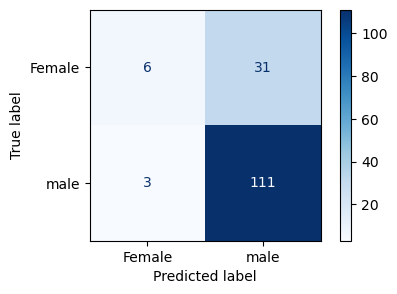

In [58]:
pipeline = Pipeline([
    ('vect', CountVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x)),
    ('norm', preprocessing.Normalizer()),
    ('clf', KNeighborsClassifier())
])
    
# Define the parameter grid for grid search
param_grid = {
    'vect__ngram_range': [(1,1), (2,2), (3,3)],
    'vect__max_features': [1000, 5000, 10000],
    'vect__min_df': [1, 2, 3],
    'vect__max_df': [0.9, 0.95, 1.0],
    'clf__n_neighbors': [3, 5, 7],
    'clf__weights': ['uniform', 'distance'],
    'norm__norm': ['l1', 'l2']
}
    

grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring=f1_score)
    
# Fit the grid search on the training data
grid_search.fit(X_train_split, y_train_split)
    
# Get the best model from grid search
best_model = grid_search.best_estimator_
models_best_estimator['KNN_CountVectorizer'] = best_model

print("Best parameters: ")
print(grid_search.best_params_)
print('\n')

y_val_predict = grid_search.predict(X_val_split)

f1 = f1_score(y_val_split, y_val_predict, average='macro')
models_best_results['KNN_CountVectorizer']= f1

print("Macro f1 score:", f1)
print('\n')
print(metrics.classification_report(y_val_split, y_val_predict))

print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(y_val_split, y_val_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Female', 'male'])
cmap = plt.cm.Blues
fig, ax = plt.subplots(figsize=(5, 3))  
cm_display.plot(cmap=cmap, ax=ax)
plt.show()

### TfidfVectorizer

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(preprocessor=<function <lambda> at 0x0000024BA6123600>,
                                                        tokenizer=<function <lambda> at 0x0000024BA4F74FE0>)),
                                       ('norm', Normalizer()),
                                       ('clf', KNeighborsClassifier())]),
             param_grid={'clf__n_neighbors': [3, 5, 7],
                         'clf__weights': ['uniform', 'distance'],
                         'norm__norm': ['l1', 'l2'],
                         'vect__max_df': [0.9, 0.95, 1.0],
                         'vect__max_features': [1000, 5000, 10000],
                         'vect__min_df': [1, 2, 3],
                         'vect__ngram_range': [(1, 1), (2, 2), (3, 3)]},
             scoring=<function f1_score at 0x0000024B9F7D9940>)

Best parameters: 
{'clf__n_neighbors': 3, 'clf__weights': 'uniform', 'norm__norm': 'l1', 'vect__max_df': 0.9, 'vect__max_features': 1000, 'vect__min_df': 1, 'vect__ngram_range': (1, 1)}


Macro f1 score: 0.5254556882463859


              precision    recall  f1-score   support

           0       0.67      0.11      0.19        37
           1       0.77      0.98      0.86       114

    accuracy                           0.77       151
   macro avg       0.72      0.55      0.53       151
weighted avg       0.75      0.77      0.70       151

Confusion Matrix:


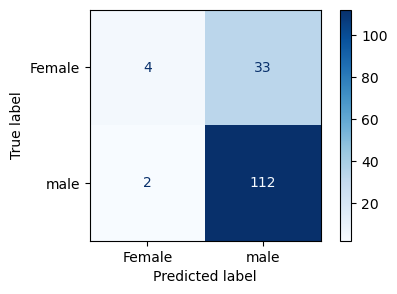

In [59]:
pipeline = Pipeline([
    ('vect', TfidfVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x)),
    ('norm', preprocessing.Normalizer()),
    ('clf', KNeighborsClassifier())
])
    
# Define the parameter grid for grid search
param_grid = {
    'vect__ngram_range': [(1,1), (2,2), (3,3)],
    'vect__max_features': [1000, 5000, 10000],
    'vect__min_df': [1, 2, 3],
    'vect__max_df': [0.9, 0.95, 1.0],
    'clf__n_neighbors': [3, 5, 7],
    'clf__weights': ['uniform', 'distance'],
    'norm__norm': ['l1', 'l2']
}
   
      
# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring=f1_score)
    
# Fit the grid search on the training data
grid_search.fit(X_train_split, y_train_split)
    
    
# Get the best model from grid search
best_model = grid_search.best_estimator_
models_best_estimator['KNN_TfidfVectorizer'] = best_model

print("Best parameters: ")
print(grid_search.best_params_)
print('\n')

y_val_predict = grid_search.predict(X_val_split)

f1 = f1_score(y_val_split, y_val_predict, average='macro')
models_best_results['KNN_TfidfVectorizer']= f1

print("Macro f1 score:", f1)
print('\n')
print(metrics.classification_report(y_val_split, y_val_predict))

print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(y_val_split, y_val_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Female', 'male'])
cmap = plt.cm.Blues
fig, ax = plt.subplots(figsize=(5, 3))  
cm_display.plot(cmap=cmap, ax=ax)
plt.show()

## NaiveBayes

### CountVectorizer

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(preprocessor=<function <lambda> at 0x0000024BA4E92B60>,
                                                        tokenizer=<function <lambda> at 0x0000024BA4F93880>)),
                                       ('norm', Normalizer()),
                                       ('clf', MultinomialNB())]),
             param_grid={'clf__alpha': [0.1, 0.5, 1.0],
                         'norm__norm': ['l1', 'l2'],
                         'vect__max_features': [5000, 10000, 20000],
                         'vect__ngram_range': [(1, 1), (2, 2), (3, 3)]},
             scoring=<function f1_score at 0x0000024B9F7D9940>)

Best parameters: 
{'clf__alpha': 0.1, 'norm__norm': 'l1', 'vect__max_features': 5000, 'vect__ngram_range': (1, 1)}


Macro f1 score: 0.43018867924528303


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.75      1.00      0.86       114

    accuracy                           0.75       151
   macro avg       0.38      0.50      0.43       151
weighted avg       0.57      0.75      0.65       151

Confusion Matrix:


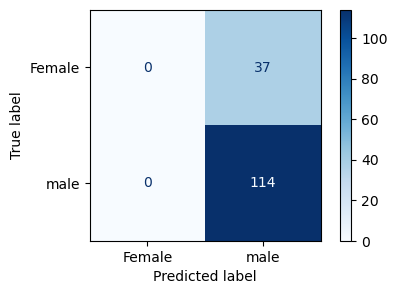

In [60]:
pipeline = Pipeline([
    ('vect', CountVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x)),
    ('norm', preprocessing.Normalizer()),
    ('clf', MultinomialNB())
])
    
# Define the parameter grid for grid search
param_grid = {
        'vect__max_features': [5000, 10000, 20000],
        'vect__ngram_range': [(1,1), (2,2), (3,3)],
        'norm__norm': ['l1', 'l2'],
        'clf__alpha': [0.1, 0.5, 1.0]
}
         
# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring=f1_score)
    
# Fit the grid search on the training data
grid_search.fit(X_train_split, y_train_split)
    
    
# Get the best model from grid search
best_model = grid_search.best_estimator_
models_best_estimator['NaiveBayes_CountVectorizer'] = best_model

print("Best parameters: ")
print(grid_search.best_params_)
print('\n')

y_val_predict = grid_search.predict(X_val_split)

f1 = f1_score(y_val_split, y_val_predict, average='macro')
models_best_results['NaiveBayes_CountVectorizer']= f1

print("Macro f1 score:", f1)
print('\n')
print(metrics.classification_report(y_val_split, y_val_predict))

print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(y_val_split, y_val_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Female', 'male'])
cmap = plt.cm.Blues
fig, ax = plt.subplots(figsize=(5, 3))  
cm_display.plot(cmap=cmap, ax=ax)
plt.show()

### TfidfVectorizer

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(preprocessor=<function <lambda> at 0x0000024BA4EBAC00>,
                                                        tokenizer=<function <lambda> at 0x0000024BA4EBAAC0>)),
                                       ('norm', Normalizer()),
                                       ('clf', MultinomialNB())]),
             param_grid={'clf__alpha': [0.1, 0.5, 1.0],
                         'norm__norm': ['l1', 'l2'],
                         'vect__max_features': [5000, 10000, 20000],
                         'vect__ngram_range': [(1, 1), (2, 2), (3, 3)]},
             scoring=<function f1_score at 0x0000024B9F7D9940>)

Best parameters: 
{'clf__alpha': 0.1, 'norm__norm': 'l1', 'vect__max_features': 5000, 'vect__ngram_range': (1, 1)}


Macro f1 score: 0.43018867924528303


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.75      1.00      0.86       114

    accuracy                           0.75       151
   macro avg       0.38      0.50      0.43       151
weighted avg       0.57      0.75      0.65       151

Confusion Matrix:


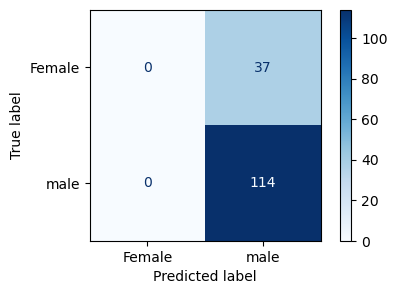

In [61]:
pipeline = Pipeline([
    ('vect', TfidfVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x)),
    ('norm', preprocessing.Normalizer()),
    ('clf', MultinomialNB())
])
    
# Define the parameter grid for grid search
param_grid = {
        'vect__max_features': [5000, 10000, 20000],
        'vect__ngram_range': [(1,1), (2,2), (3,3)],
        'norm__norm': ['l1', 'l2'],
        'clf__alpha': [0.1, 0.5, 1.0]
}
    
      
# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring=f1_score)
    
# Fit the grid search on the training data
grid_search.fit(X_train_split, y_train_split)
    
    
# Get the best model from grid search
best_model = grid_search.best_estimator_
models_best_estimator['NaiveBayes_TfidfVectorizer'] = best_model

print("Best parameters: ")
print(grid_search.best_params_)
print('\n')

y_val_predict = grid_search.predict(X_val_split)

f1 = f1_score(y_val_split, y_val_predict, average='macro')
models_best_results['NaiveBayes_TfidfVectorizer']= f1

print("Macro f1 score:", f1)
print('\n')
print(metrics.classification_report(y_val_split, y_val_predict))

print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(y_val_split, y_val_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Female', 'male'])
cmap = plt.cm.Blues
fig, ax = plt.subplots(figsize=(5, 3))  
cm_display.plot(cmap=cmap, ax=ax)
plt.show()

## DecisionTree

### CountVectorizer

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(preprocessor=<function <lambda> at 0x0000024BA4E56980>,
                                                        tokenizer=<function <lambda> at 0x0000024BA4EBBBA0>)),
                                       ('norm', Normalizer()),
                                       ('clf', DecisionTreeClassifier())]),
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [10, 20],
                         'clf__min_samples_leaf': [1, 2, 4],
                         'clf__min_samples_split': [2, 5, 10],
                         'norm__norm': ['l1', 'l2'],
                         'vect__max_features': [5000, 10000, 20000],
                         'vect__ngram_range': [(1, 1), (2, 2), (3, 3)]},
             scoring=<function f1_score at 0x0000024B9F7D9940>)

Best parameters: 
{'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'norm__norm': 'l1', 'vect__max_features': 5000, 'vect__ngram_range': (1, 1)}


Macro f1 score: 0.5732052006783493


              precision    recall  f1-score   support

           0       0.43      0.24      0.31        37
           1       0.78      0.89      0.84       114

    accuracy                           0.74       151
   macro avg       0.61      0.57      0.57       151
weighted avg       0.70      0.74      0.71       151

Confusion Matrix:


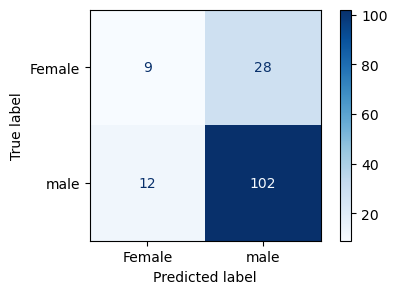

In [62]:
pipeline = Pipeline([
    ('vect', CountVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x)),
    ('norm', preprocessing.Normalizer()),
    ('clf', DecisionTreeClassifier())
])
    
# Define the parameter grid for grid search
param_grid = {
        'vect__max_features': [5000, 10000, 20000],
        'vect__ngram_range': [(1,1), (2,2), (3,3)],
        'norm__norm': ['l1', 'l2'],
        'clf__max_depth': [10, 20],
        'clf__min_samples_split': [2, 5, 10],
        'clf__min_samples_leaf': [1, 2, 4],
        'clf__criterion': ['gini', 'entropy']
}
         
# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring=f1_score)
    
# Fit the grid search on the training data
grid_search.fit(X_train_split, y_train_split)
    
    
# Get the best model from grid search
best_model = grid_search.best_estimator_
models_best_estimator['DecisionTree_CountVectorizer'] = best_model

print("Best parameters: ")
print(grid_search.best_params_)
print('\n')

y_val_predict = grid_search.predict(X_val_split)

f1 = f1_score(y_val_split, y_val_predict, average='macro')
models_best_results['DecisionTree_CountVectorizer']= f1

print("Macro f1 score:", f1)
print('\n')
print(metrics.classification_report(y_val_split, y_val_predict))

print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(y_val_split, y_val_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Female', 'male'])
cmap = plt.cm.Blues
fig, ax = plt.subplots(figsize=(5, 3))  
cm_display.plot(cmap=cmap, ax=ax)
plt.show()

### TfidfVectorizer

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(preprocessor=<function <lambda> at 0x0000024BA9D020C0>,
                                                        tokenizer=<function <lambda> at 0x0000024BA9D01D00>)),
                                       ('norm', Normalizer()),
                                       ('clf', DecisionTreeClassifier())]),
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [10, 20],
                         'clf__min_samples_leaf': [1, 2, 4],
                         'clf__min_samples_split': [2, 5, 10],
                         'norm__norm': ['l1', 'l2'],
                         'vect__max_features': [5000, 10000, 20000],
                         'vect__ngram_range': [(1, 1), (2, 2), (3, 3)]},
             scoring=<function f1_score at 0x0000024B9F7D9940>)

Best parameters: 
{'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'norm__norm': 'l1', 'vect__max_features': 5000, 'vect__ngram_range': (1, 1)}


Macro f1 score: 0.5788721855656078


              precision    recall  f1-score   support

           0       0.42      0.27      0.33        37
           1       0.79      0.88      0.83       114

    accuracy                           0.73       151
   macro avg       0.60      0.57      0.58       151
weighted avg       0.70      0.73      0.71       151

Confusion Matrix:


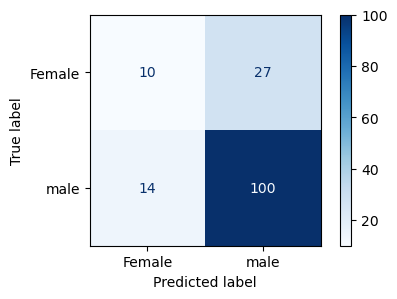

In [64]:
pipeline = Pipeline([
    ('vect', TfidfVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x)),
    ('norm', preprocessing.Normalizer()),
    ('clf', DecisionTreeClassifier())
])

# Define the parameter grid for grid search
param_grid = {
        'vect__max_features': [5000, 10000, 20000],
        'vect__ngram_range': [(1,1), (2,2), (3,3)],
        'norm__norm': ['l1', 'l2'],
        'clf__max_depth': [10, 20],
        'clf__min_samples_split': [2, 5, 10],
        'clf__min_samples_leaf': [1, 2, 4],
        'clf__criterion': ['gini', 'entropy']
}
         
# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring=f1_score)
    
# Fit the grid search on the training data
grid_search.fit(X_train_split, y_train_split)
    
# Get the best model from grid search
best_model = grid_search.best_estimator_
models_best_estimator['DecisionTree_TfidfVectorizer'] = best_model

print("Best parameters: ")
print(grid_search.best_params_)
print('\n')

y_val_predict = grid_search.predict(X_val_split)

f1 = f1_score(y_val_split, y_val_predict, average='macro')
models_best_results['DecisionTree_TfidfVectorizer']= f1

print("Macro f1 score:", f1)
print('\n')
print(metrics.classification_report(y_val_split, y_val_predict))

print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(y_val_split, y_val_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Female', 'male'])
cmap = plt.cm.Blues
fig, ax = plt.subplots(figsize=(5, 3))  
cm_display.plot(cmap=cmap, ax=ax)
plt.show()

## LinearSVC

### CountVectorizer

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(preprocessor=<function <lambda> at 0x0000024BA9D02840>,
                                                        tokenizer=<function <lambda> at 0x0000024B99542FC0>)),
                                       ('norm', Normalizer()),
                                       ('clf', LinearSVC())]),
             param_grid={'clf__C': [0.1, 1, 10],
                         'clf__max_iter': [1000, 2000, 3000],
                         'norm__norm': ['l1', 'l2'],
                         'vect__max_features': [5000, 10000, 20000],
                         'vect__ngram_range': [(1, 1), (2, 2), (3, 3)]},
             scoring=<function f1_score at 0x0000024B9F7D9940>)

Best parameters: 
{'clf__C': 0.1, 'clf__max_iter': 1000, 'norm__norm': 'l1', 'vect__max_features': 5000, 'vect__ngram_range': (1, 1)}


Macro f1 score: 0.43018867924528303


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.75      1.00      0.86       114

    accuracy                           0.75       151
   macro avg       0.38      0.50      0.43       151
weighted avg       0.57      0.75      0.65       151

Confusion Matrix:


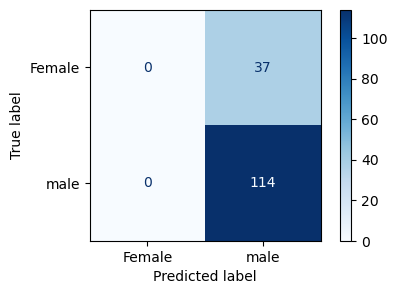

In [65]:
pipeline = Pipeline([
    ('vect', CountVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x)),
    ('norm', preprocessing.Normalizer()),
    ('clf', LinearSVC())
])
    
# Define the parameter grid for grid search
param_grid = {
        'vect__max_features': [5000, 10000, 20000],
        'vect__ngram_range': [(1,1), (2,2), (3,3)],
        'norm__norm': ['l1', 'l2'],
        'clf__C': [0.1, 1, 10],
        'clf__max_iter': [1000, 2000, 3000]
}
         
# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring=f1_score)
    
# Fit the grid search on the training data
grid_search.fit(X_train_split, y_train_split)
    
    
# Get the best model from grid search
best_model = grid_search.best_estimator_
models_best_estimator['LinearSVC_CountVectorizer'] = best_model

print("Best parameters: ")
print(grid_search.best_params_)
print('\n')

y_val_predict = grid_search.predict(X_val_split)

f1 = f1_score(y_val_split, y_val_predict, average='macro')
models_best_results['LinearSVC_CountVectorizer']= f1

print("Macro f1 score:", f1)
print('\n')
print(metrics.classification_report(y_val_split, y_val_predict))

print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(y_val_split, y_val_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Female', 'male'])
cmap = plt.cm.Blues
fig, ax = plt.subplots(figsize=(5, 3))  
cm_display.plot(cmap=cmap, ax=ax)
plt.show()

### TfidfVectorizer

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(preprocessor=<function <lambda> at 0x0000024BAB6D0F40>,
                                                        tokenizer=<function <lambda> at 0x0000024BA4E57CE0>)),
                                       ('norm', Normalizer()),
                                       ('clf', LinearSVC())]),
             param_grid={'clf__C': [0.1, 1, 10],
                         'clf__max_iter': [1000, 2000, 3000],
                         'norm__norm': ['l1', 'l2'],
                         'vect__max_features': [5000, 10000, 20000],
                         'vect__ngram_range': [(1, 1), (2, 2), (3, 3)]},
             scoring=<function f1_score at 0x0000024B9F7D9940>)

Best parameters: 
{'clf__C': 0.1, 'clf__max_iter': 1000, 'norm__norm': 'l1', 'vect__max_features': 5000, 'vect__ngram_range': (1, 1)}


Macro f1 score: 0.43018867924528303


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.75      1.00      0.86       114

    accuracy                           0.75       151
   macro avg       0.38      0.50      0.43       151
weighted avg       0.57      0.75      0.65       151

Confusion Matrix:


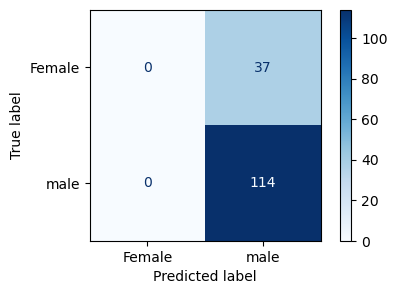

In [86]:
pipeline = Pipeline([
    ('vect', TfidfVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x)),
    ('norm', preprocessing.Normalizer()),
    ('clf', LinearSVC())
])
    
# Define the parameter grid for grid search
param_grid = {
        'vect__max_features': [5000, 10000, 20000],
        'vect__ngram_range': [(1,1), (2,2), (3,3)],
        'norm__norm': ['l1', 'l2'],
        'clf__C': [0.1, 1, 10],
        'clf__max_iter': [1000, 2000, 3000]
}
         
# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring=f1_score)
    
# Fit the grid search on the training data
grid_search.fit(X_train_split, y_train_split)
    
# Get the best model from grid search
best_model = grid_search.best_estimator_
models_best_estimator['LinearSVC_TfidfVectorizer'] = best_model

print("Best parameters: ")
print(grid_search.best_params_)
print('\n')

y_val_predict = grid_search.predict(X_val_split)

f1 = f1_score(y_val_split, y_val_predict, average='macro')
models_best_results['LinearSVC_TfidfVectorizer']= f1

print("Macro f1 score:", f1)
print('\n')
print(metrics.classification_report(y_val_split, y_val_predict))

print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(y_val_split, y_val_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Female', 'male'])
cmap = plt.cm.Blues
fig, ax = plt.subplots(figsize=(5, 3))  
cm_display.plot(cmap=cmap, ax=ax)
plt.show()

## MLPClassifier

### CountVectorizer

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(preprocessor=<function <lambda> at 0x0000024BA89E5F80>,
                                                        tokenizer=<function <lambda> at 0x0000024BA896EB60>)),
                                       ('norm', Normalizer()),
                                       ('clf', MLPClassifier())]),
             param_grid={'clf__hidden_layer_sizes': [(100,), (50, 5),
                                                     (100, 50)],
                         'norm__norm': ['l1', 'l2'],
                         'vect__max_features': [5000, 10000, 20000],
                         'vect__ngram_range': [(1, 1), (2, 2), (3, 3)]},
             scoring=<function f1_score at 0x0000024B9F7D9940>)

Best parameters: 
{'clf__hidden_layer_sizes': (100,), 'norm__norm': 'l1', 'vect__max_features': 5000, 'vect__ngram_range': (1, 1)}


Macro f1 score: 0.45813397129186606


              precision    recall  f1-score   support

           0       1.00      0.03      0.05        37
           1       0.76      1.00      0.86       114

    accuracy                           0.76       151
   macro avg       0.88      0.51      0.46       151
weighted avg       0.82      0.76      0.66       151

Confusion Matrix:


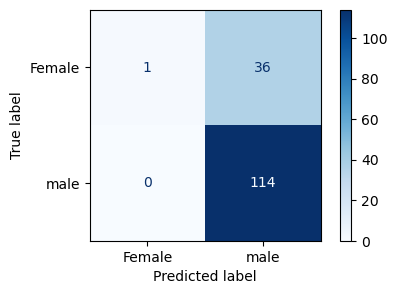

In [87]:
pipeline = Pipeline([
    ('vect', CountVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x)),
    ('norm', preprocessing.Normalizer()),
    ('clf', MLPClassifier())
])
    
# Define the parameter grid for grid search
param_grid = {
        'vect__max_features': [5000, 10000, 20000],
        'vect__ngram_range': [(1,1), (2,2), (3,3)],
        'norm__norm':['l1', 'l2'],
        'clf__hidden_layer_sizes':[(100,),(50,5),(100,50)]
}
         
# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring=f1_score)
    
# Fit the grid search on the training data
grid_search.fit(X_train_split, y_train_split)
    
# Get the best model from grid search
best_model = grid_search.best_estimator_
models_best_estimator['MLPClassifier_CountVectorizer'] = best_model

print("Best parameters: ")
print(grid_search.best_params_)
print('\n')

y_val_predict = grid_search.predict(X_val_split)

f1 = f1_score(y_val_split, y_val_predict, average='macro')
models_best_results['MLPClassifier_CountVectorizer']= f1

print("Macro f1 score:", f1)
print('\n')
print(metrics.classification_report(y_val_split, y_val_predict))

print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(y_val_split, y_val_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Female', 'male'])
cmap = plt.cm.Blues
fig, ax = plt.subplots(figsize=(5, 3))  
cm_display.plot(cmap=cmap, ax=ax)
plt.show()

### TfidfVectorizer

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(preprocessor=<function <lambda> at 0x0000024BAC6C8CC0>,
                                                        tokenizer=<function <lambda> at 0x0000024BAC160CC0>)),
                                       ('norm', Normalizer()),
                                       ('clf', MLPClassifier())]),
             param_grid={'clf__hidden_layer_sizes': [(100,), (50, 5),
                                                     (100, 50)],
                         'norm__norm': ['l1', 'l2'],
                         'vect__max_features': [5000, 10000, 20000],
                         'vect__ngram_range': [(1, 1), (2, 2), (3, 3)]},
             scoring=<function f1_score at 0x0000024B9F7D9940>)

Best parameters: 
{'clf__hidden_layer_sizes': (100,), 'norm__norm': 'l1', 'vect__max_features': 5000, 'vect__ngram_range': (1, 1)}


Macro f1 score: 0.5343425848051584


              precision    recall  f1-score   support

           0       1.00      0.11      0.20        37
           1       0.78      1.00      0.87       114

    accuracy                           0.78       151
   macro avg       0.89      0.55      0.53       151
weighted avg       0.83      0.78      0.71       151

Confusion Matrix:


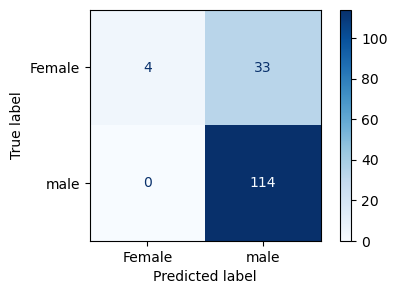

In [124]:
pipeline = Pipeline([
    ('vect', TfidfVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x)),
    ('norm', preprocessing.Normalizer()),
    ('clf', MLPClassifier())
])
    
# Define the parameter grid for grid search
param_grid = {
        'vect__max_features': [5000, 10000, 20000],
        'vect__ngram_range': [(1,1), (2,2), (3,3)],
        'norm__norm':['l1', 'l2'],
        'clf__hidden_layer_sizes':[(100,),(50,5),(100,50)]
}
         
# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring=f1_score)
    
# Fit the grid search on the training data
grid_search.fit(X_train_split, y_train_split)
    
# Get the best model from grid search
best_model = grid_search.best_estimator_
models_best_estimator['MLPClassifier_TfidfVectorizer'] = best_model

print("Best parameters: ")
print(grid_search.best_params_)
print('\n')

y_val_predict = grid_search.predict(X_val_split)

f1 = f1_score(y_val_split, y_val_predict, average='macro')
models_best_results['MLPClassifier_TfidfVectorizer']= f1

print("Macro f1 score:", f1)
print('\n')
print(metrics.classification_report(y_val_split, y_val_predict))

print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(y_val_split, y_val_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Female', 'male'])
cmap = plt.cm.Blues
fig, ax = plt.subplots(figsize=(5, 3))  
cm_display.plot(cmap=cmap, ax=ax)
plt.show()

## Perceptron

### CountVectorizer

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(preprocessor=<function <lambda> at 0x0000024BA89B9120>,
                                                        tokenizer=<function <lambda> at 0x0000024BA89BBB00>)),
                                       ('norm', Normalizer()),
                                       ('clf', Perceptron())]),
             param_grid={'clf__penalty': ['l1', 'l2', 'elasticnet'],
                         'norm__norm': ['l1', 'l2'],
                         'vect__max_features': [5000, 10000, 20000],
                         'vect__ngram_range': [(1, 1), (2, 2), (3, 3)]},
             scoring=<function f1_score at 0x0000024B9F7D9940>)

Best parameters: 
{'clf__penalty': 'l1', 'norm__norm': 'l1', 'vect__max_features': 5000, 'vect__ngram_range': (1, 1)}


Macro f1 score: 0.45813397129186606


              precision    recall  f1-score   support

           0       1.00      0.03      0.05        37
           1       0.76      1.00      0.86       114

    accuracy                           0.76       151
   macro avg       0.88      0.51      0.46       151
weighted avg       0.82      0.76      0.66       151

Confusion Matrix:


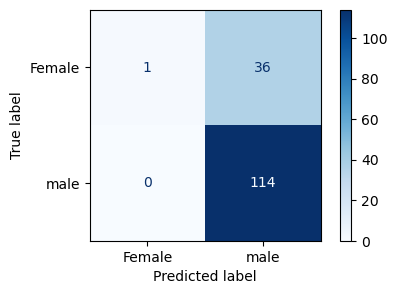

In [100]:
pipeline = Pipeline([
    ('vect', CountVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x)),
    ('norm', preprocessing.Normalizer()),
    ('clf', Perceptron())
])
    
# Define the parameter grid for grid search
param_grid = {
    'vect__max_features': [5000, 10000, 20000],
    'vect__ngram_range': [(1,1), (2,2), (3,3)],
    'norm__norm': ['l1', 'l2'],
    'clf__penalty': ['l1', 'l2', 'elasticnet'],
}

         
# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring=f1_score)
    
# Fit the grid search on the training data
grid_search.fit(X_train_split, y_train_split)
    
# Get the best model from grid search
best_model = grid_search.best_estimator_
models_best_estimator['Perceptron_CountVectorizer'] = best_model

print("Best parameters: ")
print(grid_search.best_params_)
print('\n')

y_val_predict = grid_search.predict(X_val_split)

f1 = f1_score(y_val_split, y_val_predict, average='macro')
models_best_results['Perceptron_CountVectorizer']= f1

print("Macro f1 score:", f1)
print('\n')
print(metrics.classification_report(y_val_split, y_val_predict))

print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(y_val_split, y_val_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Female', 'male'])
cmap = plt.cm.Blues
fig, ax = plt.subplots(figsize=(5, 3))  
cm_display.plot(cmap=cmap, ax=ax)
plt.show()

### TfidfVectorizer

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(preprocessor=<function <lambda> at 0x0000024BA857DD00>,
                                                        tokenizer=<function <lambda> at 0x0000024BA892E480>)),
                                       ('norm', Normalizer()),
                                       ('clf', Perceptron())]),
             param_grid={'clf__penalty': ['l1', 'l2', 'elasticnet'],
                         'norm__norm': ['l1', 'l2'],
                         'vect__max_features': [5000, 10000, 20000],
                         'vect__ngram_range': [(1, 1), (2, 2), (3, 3)]},
             scoring=<function f1_score at 0x0000024B9F7D9940>)

Best parameters: 
{'clf__penalty': 'l1', 'norm__norm': 'l1', 'vect__max_features': 5000, 'vect__ngram_range': (1, 1)}


Macro f1 score: 0.43018867924528303


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.75      1.00      0.86       114

    accuracy                           0.75       151
   macro avg       0.38      0.50      0.43       151
weighted avg       0.57      0.75      0.65       151

Confusion Matrix:


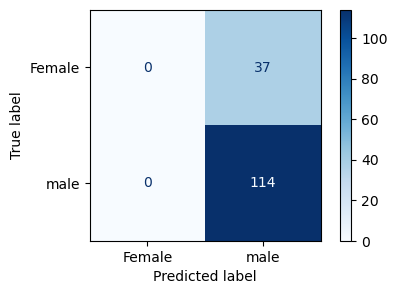

In [72]:
pipeline = Pipeline([
    ('vect', TfidfVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x)),
    ('norm', preprocessing.Normalizer()),
    ('clf', Perceptron())
])
    
# Define the parameter grid for grid search
param_grid = {
    'vect__max_features': [5000, 10000, 20000],
    'vect__ngram_range': [(1,1), (2,2), (3,3)],
    'norm__norm': ['l1', 'l2'],
    'clf__penalty': ['l1', 'l2', 'elasticnet'],
}

         
# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring=f1_score)
    
# Fit the grid search on the training data
grid_search.fit(X_train_split, y_train_split)
    
# Get the best model from grid search
best_model = grid_search.best_estimator_
models_best_estimator['Perceptron_TfidfVectorizer'] = best_model

print("Best parameters: ")
print(grid_search.best_params_)
print('\n')

y_val_predict = grid_search.predict(X_val_split)

f1 = f1_score(y_val_split, y_val_predict, average='macro')
models_best_results['Perceptron_TfidfVectorizer']= f1

print("Macro f1 score:", f1)
print('\n')
print(metrics.classification_report(y_val_split, y_val_predict))

print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(y_val_split, y_val_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Female', 'male'])
cmap = plt.cm.Blues
fig, ax = plt.subplots(figsize=(5, 3))  
cm_display.plot(cmap=cmap, ax=ax)
plt.show()

## SGDClassifier

### CountVectorizer

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(preprocessor=<function <lambda> at 0x0000024BA892D800>,
                                                        tokenizer=<function <lambda> at 0x0000024BA892E520>)),
                                       ('norm', Normalizer()),
                                       ('clf',
                                        SGDClassifier(random_state=42))]),
             param_grid={'clf__alpha': [0.0001, 0.001, 0.01],
                         'norm__norm': ['l2'],
                         'vect__max_features': [5000, 10000, 20000],
                         'vect__ngram_range': [(1, 1), (2, 2), (3, 3)]},
             scoring=<function f1_score at 0x0000024B9F7D9940>)

Best parameters: 
{'clf__alpha': 0.0001, 'norm__norm': 'l2', 'vect__max_features': 5000, 'vect__ngram_range': (1, 1)}


Macro f1 score: 0.7080558539205155


              precision    recall  f1-score   support

           0       0.75      0.41      0.53        37
           1       0.83      0.96      0.89       114

    accuracy                           0.82       151
   macro avg       0.79      0.68      0.71       151
weighted avg       0.81      0.82      0.80       151

Confusion Matrix:


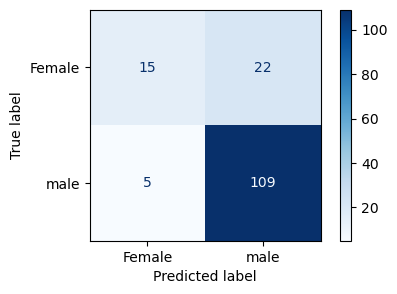

In [69]:
pipeline = Pipeline([
    ('vect', CountVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x)),
    ('norm', preprocessing.Normalizer()),
    ('clf', SGDClassifier(random_state=42))
])
    
# Define the parameter grid for grid search
param_grid = {
            'vect__max_features': [5000, 10000, 20000],
            'vect__ngram_range': [(1,1), (2,2), (3,3)],
            'norm__norm':['l2'],
            'clf__alpha':[0.0001,0.001,0.01]
}
         
# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring=f1_score)
    
# Fit the grid search on the training data
grid_search.fit(X_train_split, y_train_split)
    
# Get the best model from grid search
best_model = grid_search.best_estimator_
models_best_estimator['SGDClassifier_CountVectorizer'] = best_model

print("Best parameters: ")
print(grid_search.best_params_)
print('\n')

y_val_predict = grid_search.predict(X_val_split)

f1 = f1_score(y_val_split, y_val_predict, average='macro')
models_best_results['SGDClassifier_CountVectorizer']= f1

print("Macro f1 score:", f1)
print('\n')
print(metrics.classification_report(y_val_split, y_val_predict))

print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(y_val_split, y_val_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Female', 'male'])
cmap = plt.cm.Blues
fig, ax = plt.subplots(figsize=(5, 3))  
cm_display.plot(cmap=cmap, ax=ax)
plt.show()

### TfidfVectorizer

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(preprocessor=<function <lambda> at 0x0000024BA9FBD300>,
                                                        tokenizer=<function <lambda> at 0x0000024BA9FBD9E0>)),
                                       ('norm', Normalizer()),
                                       ('clf', SGDClassifier())]),
             param_grid={'clf__alpha': [0.0001, 0.001, 0.01],
                         'norm__norm': ['l2'],
                         'vect__max_features': [5000, 10000, 20000],
                         'vect__ngram_range': [(1, 1), (2, 2), (3, 3)]},
             scoring=<function f1_score at 0x0000024B9F7D9940>)

Best parameters: 
{'clf__alpha': 0.0001, 'norm__norm': 'l2', 'vect__max_features': 5000, 'vect__ngram_range': (1, 1)}


Macro f1 score: 0.668182162612715


              precision    recall  f1-score   support

           0       0.75      0.32      0.45        37
           1       0.81      0.96      0.88       114

    accuracy                           0.81       151
   macro avg       0.78      0.64      0.67       151
weighted avg       0.80      0.81      0.78       151

Confusion Matrix:


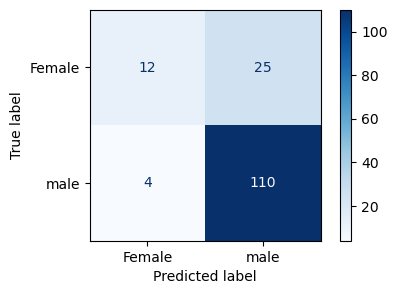

In [66]:
pipeline = Pipeline([
    ('vect', TfidfVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x)),
    ('norm', preprocessing.Normalizer()),
    ('clf', SGDClassifier())
])
    
# Define the parameter grid for grid search
param_grid = {
            'vect__max_features': [5000, 10000, 20000],
            'vect__ngram_range': [(1,1), (2,2), (3,3)],
            'norm__norm':['l2'],
            'clf__alpha':[0.0001,0.001,0.01]
}
         
# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring=f1_score)
    
# Fit the grid search on the training data
grid_search.fit(X_train_split, y_train_split)
    
# Get the best model from grid search
best_model = grid_search.best_estimator_
models_best_estimator['SGDClassifier_TfidfVectorizer'] = best_model

print("Best parameters: ")
print(grid_search.best_params_)
print('\n')

y_val_predict = grid_search.predict(X_val_split)

f1 = f1_score(y_val_split, y_val_predict, average='macro')
models_best_results['SGDClassifier_TfidfVectorizer']= f1

print("Macro f1 score:", f1)
print('\n')
print(metrics.classification_report(y_val_split, y_val_predict))

print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(y_val_split, y_val_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Female', 'male'])
cmap = plt.cm.Blues
fig, ax = plt.subplots(figsize=(5, 3))  
cm_display.plot(cmap=cmap, ax=ax)
plt.show()

In [125]:
models_best_results.keys()

dict_keys(['KNN_CountVectorizer', 'KNN_TfidfVectorizer', 'NaiveBayes_CountVectorizer', 'NaiveBayes_TfidfVectorizer', 'DecisionTree_CountVectorizer', 'DecisionTree_TfidfVectorizer', 'LinearSVC_CountVectorizer', 'SGDClassifier_TfidfVectorizer', 'SGDClassifier_CountVectorizer', 'Perceptron_TfidfVectorizer', 'MLPClassifier_CountVectorizer', 'LinearSVC_TfidfVectorizer', 'Perceptron_CountVectorizer', 'MLPClassifier_TfidfVectorizer'])

### Visualization to show the best scores

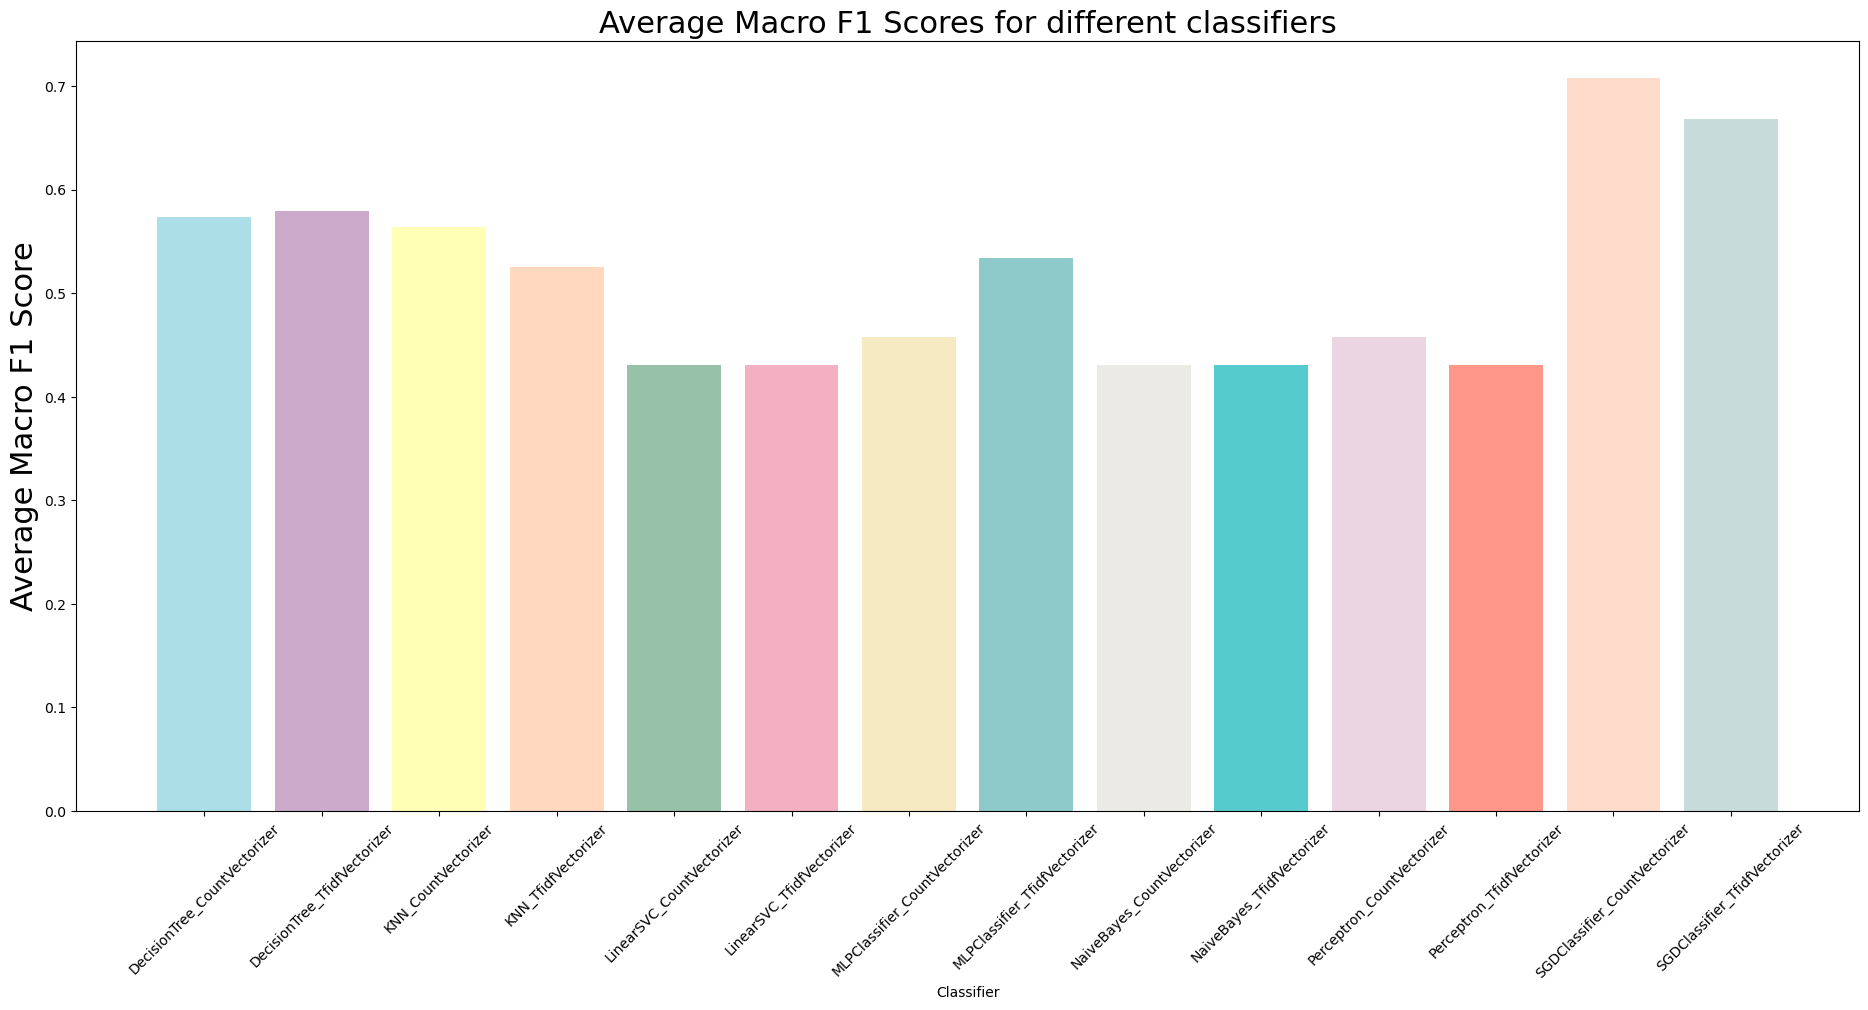

In [126]:
colors = ['#ABDEE6', '#CBAACB', '#FFFFB5', '#FFD8BE', '#97C1A9', '#F3B0C3','#F6EAC2','#8FCACA', '#ECEAE4', '#55CBCD', '#ECD5E3', '#FF968A', '#FFDBCC','#C6DBDA']

sort_dict = dict(sorted(models_best_results.items()))

classifier_names = list(sort_dict.keys())
scores = list(sort_dict.values())

plt.figure(figsize=(23, 10)) 

plt.bar(classifier_names, scores, color=colors)
plt.xlabel('Classifier')
plt.ylabel('Average Macro F1 Score', fontsize=22)
plt.title('Average Macro F1 Scores for different classifiers', fontsize=22)
plt.xticks(rotation=45)
plt.show();

In [127]:
best_model_name, best_model = max(models_best_results.items(), key=lambda item: item[1])
print("Best model name:", best_model_name)
print()
print("Best macro f1 score:", best_model)
print()
best_estimator = models_best_estimator[best_model_name]
print("Best estimator:", best_estimator)

Best model name: SGDClassifier_CountVectorizer

Best macro f1 score: 0.7080558539205155

Best estimator: Pipeline(steps=[('vect',
                 CountVectorizer(max_features=5000,
                                 preprocessor=<function <lambda> at 0x0000024BA892D800>,
                                 tokenizer=<function <lambda> at 0x0000024BA892E520>)),
                ('norm', Normalizer()),
                ('clf', SGDClassifier(random_state=42))])


### Now we will train the df_test

In [128]:
df_test

,test_example_id,story,tokens,filtered_tokens
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...,"[כל, קיץ, אני, והמשפחה, נוסעים, לארצות, הברית,...","[קיץ, והמשפחה, נוסעים, לארצות, הברית, לוס, אנג..."
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""...","[הגעתי, לשירות, המדינה, אחרי, שנתיים, כפעיל, ב...","[הגעתי, לשירות, המדינה, שנתיים, כפעיל, בתנועת,..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...,"[אחת, האהבות, הגדולות, שלי, אלו, הכלבים, שלי, ...","[האהבות, הגדולות, אלו, הכלבים, ושל, אישתי, למי..."
3,3,"רגע הגיוס לצבא היה הרגע הכי משמעותי עבורי, אני...","[רגע, הגיוס, לצבא, היה, הרגע, הכי, משמעותי, עב...","[רגע, הגיוס, לצבא, הרגע, משמעותי, עבורי, זוכר,..."
4,4,אני הגעתי לברזיל ישר מקולומביה וגם אני עשיתי ע...,"[אני, הגעתי, לברזיל, ישר, מקולומביה, וגם, אני,...","[הגעתי, לברזיל, מקולומביה, עשיתי, עבודת, מחקר,..."
...,...,...,...,...
318,318,"בשנה האחרונה הרגשתי די תקוע בעבודה, השגרה הפכה...","[בשנה, האחרונה, הרגשתי, די, תקוע, בעבודה, השגר...","[בשנה, די, תקוע, בעבודה, השגרה, הפכה, למשהו, ב..."
319,319,אני ואילן חברים טובים מזה 20 שנה תמיד חלמנו לפ...,"[אני, ואילן, חברים, טובים, מזה, שנה, תמיד, חלמ...","[ואילן, טובים, מזה, חלמנו, לפתח, רקטה, שתיקח, ..."
320,320,מידי יום שישי אני נוהג לנסוע בתחבורה ציבורית ס...,"[מידי, יום, שישי, אני, נוהג, לנסוע, בתחבורה, צ...","[מידי, שישי, נוהג, לנסוע, בתחבורה, ציבורית, סת..."
321,321,"לפני מספר חודשים, בשיא התחלואה של הגל השני, עמ...","[לפני, מספר, חודשים, בשיא, התחלואה, של, הגל, ה...","[בשיא, התחלואה, הגל, עמית, למשרד, בעבודה, התגל..."


In [129]:

def remove_common_words(tokens, common_words):
    return [token for token in tokens if token not in common_words]

df_test['tokens'] = df_test['story'].apply(custom_tokenizer)

df_test['filtered_tokens'] = df_test['tokens'].apply(lambda tokens: remove_common_words(tokens, common_words))


In [130]:
df_test_for_predict = df_test['filtered_tokens']

In [131]:
df_test_for_predict

0      [קיץ, והמשפחה, נוסעים, לארצות, הברית, לוס, אנג...
1      [הגעתי, לשירות, המדינה, שנתיים, כפעיל, בתנועת,...
2      [האהבות, הגדולות, אלו, הכלבים, ושל, אישתי, למי...
3      [רגע, הגיוס, לצבא, הרגע, משמעותי, עבורי, זוכר,...
4      [הגעתי, לברזיל, מקולומביה, עשיתי, עבודת, מחקר,...
                             ...                        
318    [בשנה, די, תקוע, בעבודה, השגרה, הפכה, למשהו, ב...
319    [ואילן, טובים, מזה, חלמנו, לפתח, רקטה, שתיקח, ...
320    [מידי, שישי, נוהג, לנסוע, בתחבורה, ציבורית, סת...
321    [בשיא, התחלואה, הגל, עמית, למשרד, בעבודה, התגל...
322    [דיווחתי, גניבה, האוטו, התעוררתי, באיחור, לעבו...
Name: filtered_tokens, Length: 323, dtype: object

In [132]:
# Predict on the test data
y_test_pred = best_estimator.predict(df_test_for_predict)

# Save predictions
df_predicted = df_test.copy()
df_predicted.shape
df_predicted['predicted_category'] = y_test_pred
df_predicted = df_predicted.drop(columns=['story', 'tokens', 'filtered_tokens'])

df_predicted['predicted_category'] = label_encoder.inverse_transform(df_predicted['predicted_category'])
df_predicted

(323, 4)

,test_example_id,predicted_category
0,0,m
1,1,m
2,2,m
3,3,m
4,4,m
...,...,...
318,318,m
319,319,m
320,320,m
321,321,m


In [133]:
predicted_counts = df_predicted['predicted_category'].value_counts()
print(predicted_counts)

m    281
f     42
Name: predicted_category, dtype: int64


### Predicting the first 5 examples

In [134]:
print(df_predicted.head())

   test_example_id predicted_category
0                0                  m
1                1                  m
2                2                  m
3                3                  m
4                4                  m


### Predicting the last 5 examples

In [135]:
print(df_predicted.tail())

     test_example_id predicted_category
318              318                  m
319              319                  m
320              320                  m
321              321                  m
322              322                  m


### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [136]:
df_predicted.to_csv('classification_results.csv',index=False)